# **Assignment: Regression Models**


1. Create a Multiple Linear Regression in R and Python using the Boston Housing dataset from the Python notebook. 
   * Note: for Python make sure to use a different feature set than the 
one we used in the lecture.
2. You will need to save the Boston Housing Data from the Python notebook and load the data into your R notebook for modeling.
3. Try to improve your scores as much as possible and report which features were deemed most important by R.


# **Multiple Linear Regression**
**Boston Dataset**

Number of Instances: 506 
Number of Attributes: 13 numeric/categorical predictive 1 target.


Attribute:  

*   CRIM     per capita crime rate by town
*   ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
*   INDUS    proportion of non-retail business acres per town
*   CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
*   NOX      nitric oxides concentration (parts per 10 million)
*   RM       average number of rooms per dwelling
*   AGE      proportion of owner-occupied units built prior to 1940
*   DIS      weighted distances to five Boston employment centres
*   RAD      index of accessibility to radial highways
*   TAX      full-value property-tax rate per $10,000
*   PTRATIO  pupil-teacher ratio by town
*   B        is the proportion of black people by town 
*  MEDV      Median value of owner-occupied homes in 1000s
*  LSTAT     % lower status of the population




In [332]:
# Imports required library

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

from sklearn.datasets import load_boston

In [2]:
# Boston Housing Dataset
boston = load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [3]:
# load keys from boston dict
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [5]:
# put it into a pandas dataframe
bostondf = pd.DataFrame(boston['data'])
bostondf

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [6]:
boston['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [7]:
# set column names to feature names
bostondf.columns = boston['feature_names']
bostondf

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [8]:
# add in the price (target) column
bostondf['target'] = boston['target']
bostondf

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


Check if and to see where we are missing data!

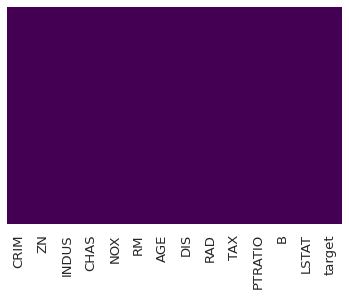

In [13]:
sns.heatmap(bostondf.isnull(),yticklabels=False,cbar=False,cmap='viridis')

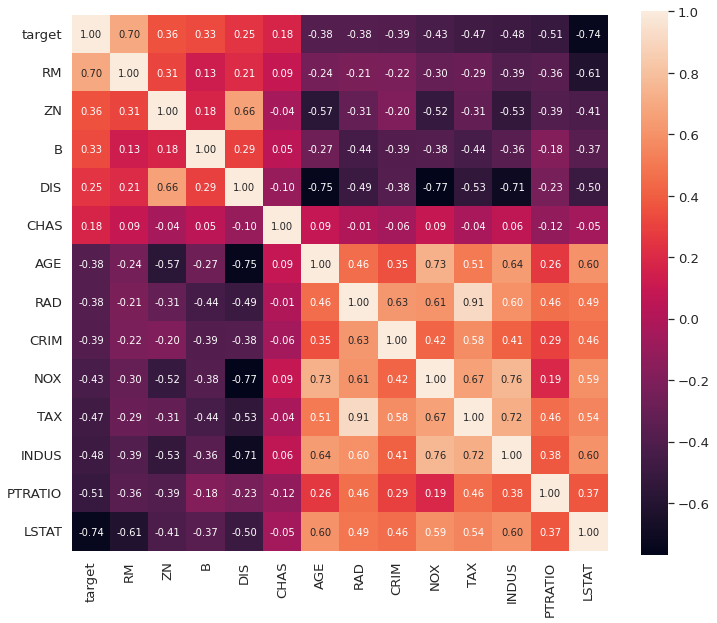

In [32]:
# Create a sorted heatmap
# Place the target (dependent variable) on top
# Arrange featuress in descending order of correlation with target 
k = 14 # number of variables for heatmap
corrmat = bostondf.corr()
cols = corrmat.nlargest(k, "target")["target"].index
cm = np.corrcoef(bostondf[cols].values.T)
fig, ax = plt.subplots(figsize=(12, 10))
sns.set(font_scale=1.2)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt=".2f", annot_kws={"size": 10}, 
                 yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [319]:
#vars = [ 'RM','INDUS','PTRATIO','LSTAT','NOX','TAX']
vars = [ 'RM','LSTAT','PTRATIO','ZN','INDUS','B','DIS']

X = bostondf[vars]
y = bostondf.target

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=2)

In [320]:
X_train

,RM,LSTAT,PTRATIO,ZN,INDUS,B,DIS
312,6.023,11.72,18.4,0.0,9.90,396.30,2.8340
328,5.868,9.97,16.9,0.0,3.24,382.44,5.2146
251,6.438,3.59,19.1,22.0,5.86,377.07,7.3967
205,5.891,10.87,18.6,0.0,10.59,396.90,3.9454
231,7.412,5.25,17.4,0.0,6.20,376.14,3.6715
...,...,...,...,...,...,...,...
22,6.142,18.72,21.0,0.0,8.14,396.90,3.9769
72,6.065,5.52,19.2,0.0,10.81,390.91,5.2873
493,5.707,12.01,19.2,0.0,9.69,396.90,2.3817
15,5.834,8.47,21.0,0.0,8.14,395.62,4.4986


In [321]:
y_test

463    20.2
152    15.3
291    37.3
183    32.5
384     8.8
       ... 
160    27.0
438     8.4
282    46.0
294    21.7
7      27.1
Name: target, Length: 127, dtype: float64

In [322]:
multi_lr = LinearRegression()

In [323]:
multi_lr.fit(X_train, y_train)

LinearRegression()

In [324]:
multi_lr.intercept_

22.316752759724796

In [325]:
multi_lr.coef_

array([ 3.93793639, -0.61472624, -0.85498124,  0.03025248, -0.14193273,
        0.01283628, -1.13162955])

In [326]:
predictions = multi_lr.predict(pd.DataFrame(X_test))

predictions

array([23.68420568, 21.84022846, 32.88319805, 30.97493311,  2.8890034 ,
        3.16186707, 26.34834869, 25.26573152, 17.36734863, 25.36428011,
       31.52434541, 25.45488463, 21.57467214, 18.6406281 , 17.51214765,
       25.23531566, 19.26571476, 13.60930257,  8.22962268, 19.4869193 ,
       22.69840777, 21.12938754, 37.43596607, 20.69919042, 20.47804885,
       16.91936996, 37.97317378, 35.0868192 , 30.3923595 , 24.13781154,
       17.58535536, 21.4804421 , 32.0753493 , 30.0052382 , 14.55581327,
       19.35356721, 13.07631734, 21.69122603, 26.06551116, 22.71149309,
       27.69225735, 12.75551584, 32.20679542,  6.84636324, 21.67538129,
       20.60713623, 34.37609905, 19.57936335, 36.70087793, -1.81510458,
       32.03298558, 32.28883469,  8.55528418, 33.42760905, 19.91289658,
       20.85385087, 19.74591782, 19.53820237, 16.59812396, 18.80939355,
       17.66755739, 18.45570069, 18.68270379, 31.10913558, 34.00799177,
       25.85628618, 40.07479511, 28.85327868, 14.0247341 , 27.72

In [327]:
multi_predictions = multi_lr.predict(X_test)

In [328]:
predictions[-5:]

array([30.51594255,  3.76063178, 36.90737892, 22.79895703, 19.47607637])

In [329]:
y_test.tail()

160    27.0
438     8.4
282    46.0
294    21.7
7      27.1
Name: target, dtype: float64

In [330]:
r2_score(y_true=y_test, y_pred=multi_predictions)

0.7312210544497519

In [331]:
mean_absolute_error(y_true=y_test, y_pred=predictions)

3.393018882782305

**I used the most effective variables and the score was 73%
and the error not very big**